# Initital Data Preparation

In [688]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [689]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [690]:
len(df)

7043

In [691]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [692]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [693]:
# how many columns are numerical and how many are categorical?
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [694]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [695]:
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


Set missing values to zero.

In [696]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [697]:
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,0.0
753,3115-CZMZD,0.0
936,5709-LVOEQ,0.0
1082,4367-NUYAO,0.0
1340,1371-DWPAZ,0.0
3331,7644-OMVMY,0.0
3826,3213-VVOLG,0.0
4380,2520-SGTTA,0.0
5218,2923-ARZLG,0.0
6670,4075-WKNIU,0.0


In [698]:
# check
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [699]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [700]:
# check that columns are lower case and have underscores instead of spaces
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [701]:
# convert churn to binary indicator
df.churn = (df.churn == 'yes').astype(int)

In [702]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

# Test-Train Split

## Train-Test Split

In [703]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

## Validation Split

In [704]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train  = df_train.churn.values
y_val = df_val.churn.values

# delete churn columns from both dataframe sto make sure we don't use them by accident
del df_train['churn']
del df_val['churn']

In [705]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

# Check Distribution Of Target Variable

Global churn rate: 0.27


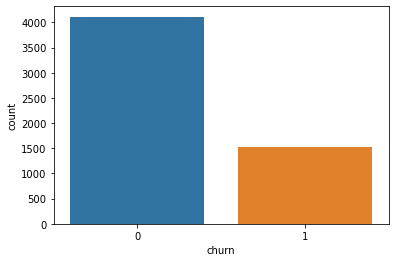

In [706]:
# make seaborn graph of Churn rate
global_churn_rate = df_train_full.churn.mean()
round(global_churn_rate, 2)
print(f'Global churn rate: {round(global_churn_rate, 2)}')

# plot count of churn with seaborn
sns.countplot(x='churn', data=df_train_full);

In [707]:
# split features into numerical and categorical
numerical = ['tenure', 'monthlycharges', 'totalcharges']
# get categorical columns
categorical = [col for col in df_train.columns if col not in numerical]

# check both
print(numerical)
print(categorical)

['tenure', 'monthlycharges', 'totalcharges']
['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [708]:
df_train_full[categorical].nunique()

customerid          5634
gender                 2
seniorcitizen          2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
dtype: int64

# Feature Importance

## Churn Rate

In [709]:
# get mean of female customers who churned
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
# do same for male customers
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

# check both
print(female_mean)
print(male_mean)

0.27682403433476394
0.2632135306553911


In [710]:
# now do for partner
partner_yes_mean = df_train_full[df_train_full.partner == 'yes'].churn.mean()
partner_no_mean = df_train_full[df_train_full.partner == 'no'].churn.mean()

In [711]:
from IPython.display import display

for col in categorical:
    print(col)
    df_group = df_train_full.groupby(col).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print('\n')

customerid


,mean,count,diff,risk
customerid,,,,
0002-orfbo,0,1,-0.269968,0.000000
0004-tlhlj,1,1,0.730032,3.704142
0011-igkff,1,1,0.730032,3.704142
0013-exchz,1,1,0.730032,3.704142
0013-mhzwf,0,1,-0.269968,0.000000
...,...,...,...,...
9987-lutyd,0,1,-0.269968,0.000000
9992-rramn,1,1,0.730032,3.704142
9992-ujoel,0,1,-0.269968,0.000000




gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## Mututal Information

In [712]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
customerid,0.583227
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581


# Correlation Coefficient

In [713]:
df_train_full[numerical].corrwith(df_train_full.churn)
'''
negative correlation between tenure and churn
positive correlation between monthly charges and churn
negative correlation with total charges indicates investment bias
'''

'\nnegative correlation between tenure and churn\npositive correlation between monthly charges and churn\nnegative correlation with total charges indicates investment bias\n'

# Feature Engineering

In [714]:
# use dictvectorizer for categorical features
from sklearn.feature_extraction import DictVectorizer

train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [715]:
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
       6.0459e+03])

In [716]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'customerid=0002-orfbo',
 'customerid=0013-exchz',
 'customerid=0013-mhzwf',
 'customerid=0013-smeoe',
 'customerid=0014-bmaqu',
 'customerid=0015-uocoj',
 'customerid=0017-dinoc',
 'customerid=0018-nyrou',
 'customerid=0019-efaep',
 'customerid=0021-ikxgc',
 'customerid=0023-uyupn',
 'customerid=0027-kwykw',
 'customerid=0030-fnxpp',
 'customerid=0036-ihmot',
 'customerid=0042-jvwoj',
 'customerid=0042-rlhyp',
 'customerid=0052-dckon',
 'customerid=0056-epfbg',
 'customerid=0057-qbuqh',
 'customerid=0064-sudog',
 'customerid=0071-ndafp',
 'customerid=0078-xzmht',
 'customerid=0080-emyvy',
 'customerid=0080-orozo',
 'customerid=0083-pivik',
 'customerid=0093-xwzfy',
 'customerid=0094-oifmo',
 'customerid=0098-bowso',
 'customerid=0100-duvfc',
 'customerid=0103-csitq',
 'customerid=0104-ppxdv',
 'customerid=0106-ugrdo',
 'customerid=0107-weslm',
 'customerid=0107-yhina',
 'customerid=0112-qawrz',
 'customerid=0114-

# Model Training

In [717]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [718]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [719]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.24773384, 0.29481351, 0.31172969, ..., 0.05439728, 0.6175448 ,
       0.07030203])

In [720]:
y_pred >= 0.5

array([False, False, False, ..., False,  True, False])

In [721]:
churn = y_pred >= 0.5

In [722]:
(y_val == churn).mean()

0.7978494623655914

# Feature Importances

In [723]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.538,
 'contract=one_year': -0.103,
 'contract=two_year': -0.566,
 'customerid=0002-orfbo': -0.006,
 'customerid=0013-exchz': 0.009,
 'customerid=0013-mhzwf': -0.01,
 'customerid=0013-smeoe': -0.002,
 'customerid=0014-bmaqu': -0.001,
 'customerid=0015-uocoj': -0.012,
 'customerid=0017-dinoc': -0.0,
 'customerid=0018-nyrou': -0.017,
 'customerid=0019-efaep': -0.002,
 'customerid=0021-ikxgc': -0.02,
 'customerid=0023-uyupn': -0.0,
 'customerid=0027-kwykw': -0.015,
 'customerid=0030-fnxpp': -0.005,
 'customerid=0036-ihmot': -0.003,
 'customerid=0042-jvwoj': -0.001,
 'customerid=0042-rlhyp': -0.0,
 'customerid=0052-dckon': -0.003,
 'customerid=0056-epfbg': -0.002,
 'customerid=0057-qbuqh': -0.001,
 'customerid=0064-sudog': -0.002,
 'customerid=0071-ndafp': -0.001,
 'customerid=0078-xzmht': -0.001,
 'customerid=0080-emyvy': -0.005,
 'customerid=0080-orozo': -0.009,
 'customerid=0083-pivik': -0.001,
 'customerid=0093-xwzfy': 0.015,
 'customerid=0094-oifmo': 0.007

Build a simpler model with three features.

In [724]:
small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

In [725]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')